# Analysis of Covid Data in the state of Texas

#### _In this assignment, we will be combining datasets on Covid cases and vaccinations for the state of Texas, as well as the US Census. The information will be taken directly from dshs.texas.gov and census.gov, which is the official website for Texas Department of State Health Services and the official website for national censuses, respectively._

#### Note: since the data on the TX website is in Excel files, we will be first downloading the files, converting them to csv, and them reading them from the computer. It is possible to read them on the web, but that requires more packages and different calls.

First, proceed to the site https://dshs.texas.gov/coronavirus/AdditionalData.aspx
On the website, it says "Texas Data" in big blue letters. Under it there is an Excel File for [Accessible Dashboard Data](https://dshs.texas.gov/coronavirus/TexasCOVID19CaseCountData.xlsx) - also linked here. Download that onto your device.

Afterards, scroll down to "Vaccination Data and Information" section. Under "COVID-19 Vaccine in Texas Dashboard, there is an Excel File for [Accessible Vaccine Dashboard Data](https://dshs.texas.gov/immunize/covid19/COVID-19-Vaccine-Data-by-County.xls). Download that file onto your device as well.

Now, open the two downloaded files on your computer (or browser if you're working in Google Sheets). Make sure to open both file to editing, so that you can save them as .csv afterwards.

In "COVID-19 Vaccine Data By County.xlsx", the first page of the file is "About the Data". Go to the second page, named "COVID-19_Vaccine_Data_By_County". Now, in the top left corner click on _File > Save As_. Save the file as .csv.

It will pop a warning that csv can only take 1 page at a time. Click "Ok". This is why it is important to go to the second page before saving as .csv - the page that is open is what is moved into the .csv file. 

In "CaseCountData.xlsx", stay on the first page and save it as .csv file as well.

#### Now that our setup is complete, time to start coding!

First, import the necesary packages into the notebook. Make sure to have %matplotlib inline for the graphs to be inlined within the notebook.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now, time to call the files. I will start by calling the Vaccine Data. Go to the folder you saved the data in and copy its Path. Use pd.read_csv to read the file. It is not necesary to put the "r" before the path (to just read the file), but I do so just in case. Print the table.

In [2]:
covid01 = pd.read_csv(r"C:\Users\naila\Downloads\COVID-19_Vaccine_Data_by_County.csv")
covid01

,County Name,Public Health Region (PHR),Total Doses Allocated,Vaccine Doses Administered,People Vaccinated with at least One Dose,People Fully Vaccinated,People Vaccinated with at least One Booster Dose,Population 6Mo+,Population\n5+,Population\n12+,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Texas,--,"27,511,535","47,252,406","21,634,730","18,011,219","7,441,691","28,781,973","26,967,586","24,068,624",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Federal Long-Term Care Vaccination Program,--,"720,525",--,--,--,NaN,NaN,NaN,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Federal Pharmacy Retail Vaccination Program,--,"5,509,700",--,--,--,NaN,NaN,NaN,--,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Anderson,4/5N,"17,870","61,589","27,654","24,550","10,256","57,373","54,637","50,661",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andrews,9/10,"6,100","20,924","9,363","8,337","3,062","18,660","17,266","14,863",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,Yoakum,1,"3,400","8,388","4,130","3,510","1,172","8,554","7,851","6,743",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
254,Young,2/3,"8,500","18,141","8,351","7,514","2,854","18,104","16,969","15,127",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Zapata,11,"8,400","21,446","10,073","8,576","3,016","13,985","12,905","10,966",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zavala,8,"2,200","16,205","7,190","6,160","2,399","12,092","11,189","9,644",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To know what data type each column is:

In [3]:
for col in covid01.columns:
    print(col, type(covid01[col][0]))

County Name <class 'str'>
Public Health Region (PHR) <class 'str'>
Total Doses Allocated <class 'str'>
Vaccine Doses Administered <class 'str'>
People Vaccinated with at least One Dose <class 'str'>
People Fully Vaccinated <class 'str'>
People Vaccinated with at least One Booster Dose <class 'str'>
Population 6Mo+ <class 'str'>
Population
5+ <class 'str'>
Population
12+ <class 'str'>
Population, 16+ <class 'str'>
Population, 65+ <class 'str'>
Population, Phase 1A Healthcare Workers <class 'str'>
Population, Phase 1A Long-term Care Residents <class 'str'>
Population, 16-64
 Any Medical Condition <class 'str'>
Population, Education and Child Care Personnel <class 'str'>
Unnamed: 16 <class 'numpy.float64'>
Unnamed: 17 <class 'numpy.float64'>
Unnamed: 18 <class 'numpy.float64'>
Unnamed: 19 <class 'numpy.float64'>
Unnamed: 20 <class 'numpy.float64'>
Unnamed: 21 <class 'numpy.float64'>
Unnamed: 22 <class 'numpy.float64'>
Unnamed: 23 <class 'numpy.float64'>
Unnamed: 24 <class 'numpy.float64'>

As you can see in the first 4 rows of the table, it begins with the total counts for the state of Texas in line 1 and states how many doses were allocated by _Federal Long-Term Care Vaccination Program_ and _Federal Pharmacy Retail Vaccination Program_ in lines 1,2. The last line, 257, is the 'Other' data which does not have all datapoints. We do not need any of that information, so use the .drop() function to remove those items.

To make sure the original dataset is saved in a separate file, let's assign all changes into a new dataset named covid1.

In [4]:
covid1=covid01.drop(0)
covid1=covid1.drop(1)
covid1=covid1.drop(2)
covid1=covid1.drop(257)

Additionally, let's rename the columns for "County Name" and "Population 6Mo+" to "County" and "Population", since having variables with spaces can create trouble in code.

In [5]:
covid1.rename(columns={'County Name': 'County'}, inplace=True)
covid1.rename(columns={'Population 6Mo+': 'Population'}, inplace=True)

Now, as you can see in the table above, all the seemingly numerical values have comas in them, meaning that they are interpreted as strings in the table. That can be fixed by removing the comas and changing the datatype. Since we will only be using three columns from this table, we can just edit them.

In [6]:
covid1 = covid1.replace(',','', regex=True) #removing the comas
covid1['Population'] = covid1['Population'].astype(int) #changing strings with numbers to integers
covid1['People Fully Vaccinated'] = covid1['People Fully Vaccinated'].astype(int)
covid1['Total Doses Allocated'] = covid1['Total Doses Allocated'].astype(int)
covid1.head()

,County,Public Health Region (PHR),Total Doses Allocated,Vaccine Doses Administered,People Vaccinated with at least One Dose,People Fully Vaccinated,People Vaccinated with at least One Booster Dose,Population,Population\n5+,Population\n12+,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
3,Anderson,4/5N,17870,61589,27654,24550,10256,57373,54637,50661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andrews,9/10,6100,20924,9363,8337,3062,18660,17266,14863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Angelina,4/5N,58100,103162,45177,40302,16664,87038,81499,72486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Aransas,11,6840,37721,16182,14153,6555,23673,22639,20834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Archer,2/3,3200,10301,4548,4190,1666,8524,7996,7388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As you see above, after droping the first three lines of the  dataset, the count is  starting at 3. To fix that, use the .reset_index(drop=True, inplace=True) function.

In [7]:
covid1.reset_index(drop=True, inplace=True)
covid1

,County,Public Health Region (PHR),Total Doses Allocated,Vaccine Doses Administered,People Vaccinated with at least One Dose,People Fully Vaccinated,People Vaccinated with at least One Booster Dose,Population,Population\n5+,Population\n12+,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,Anderson,4/5N,17870,61589,27654,24550,10256,57373,54637,50661,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Andrews,9/10,6100,20924,9363,8337,3062,18660,17266,14863,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angelina,4/5N,58100,103162,45177,40302,16664,87038,81499,72486,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aransas,11,6840,37721,16182,14153,6555,23673,22639,20834,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Archer,2/3,3200,10301,4548,4190,1666,8524,7996,7388,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Wood,4/5N,6700,52073,22401,20238,9465,45659,43522,39990,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,Yoakum,1,3400,8388,4130,3510,1172,8554,7851,6743,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
251,Young,2/3,8500,18141,8351,7514,2854,18104,16969,15127,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
252,Zapata,11,8400,21446,10073,8576,3016,13985,12905,10966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before calling in the data for Case Count, go into the csv file and remove the first line ( the description of the graph). That way the titles for columns from the second line will apply to the table in jupyter, instead of becoming the 0th row of the table. Afterwards, we read it in just like the .csv file before - using pd.read_csv(). Print out the first few lines.

In [8]:
covid=pd.read_csv(r"C:\Users\naila\Downloads\CaseCountData.csv")

covid.head()

,County,Confirmed Cases,Probable Cases,Fatalities
0,Anderson,7196,3340,250
1,Andrews,3614,1052,73
2,Angelina,9669,6869,492
3,Aransas,3953,1236,92
4,Archer,2178,316,28


To know what data type each column is:

In [9]:
for col in covid.columns:
    print(col, type(covid[col][0]))

County <class 'str'>
Confirmed Cases <class 'numpy.int64'>
Probable Cases <class 'numpy.int64'>
Fatalities <class 'numpy.int64'>


Now, proceed to [the census website](https://www.census.gov/data-tools/demo/saipe/#/?s_state=48&s_county=&s_district=&s_measures=mhi) and download the csv file for Median Household Income in the state of Texas. Use pd.read_csv and the path of the downloaded file to call it in the notebook. Print out the first few lines.

In [10]:
income = pd.read_csv(r"C:\Users\naila\Downloads\SAIPE_09-19-2022.csv")
income.head()

,Year,ID,Name,Median Household Income*,90% Confidence Interval
0,2020,0,United States,67340,"67,251 to 67,429"
1,2020,48000,Texas,66048,"65,365 to 66,731"
2,2020,48001,Anderson County,50879,"45,179 to 56,579"
3,2020,48003,Andrews County,76600,"65,269 to 87,931"
4,2020,48005,Angelina County,49943,"44,981 to 54,905"


As you can see, we have the first two lines with non-counties (national and state averages), as well as the County column called _Name_ and having the word _County_ after the name of each county. Let's change that to make it easier to match the dataset with the other two. Also, lets rename _Median Household Income*_ to _Median Income_

In [11]:
income1=income.drop(0)
income1=income1.drop(1)
income1.reset_index(drop=True, inplace=True)
income1.rename(columns={'Name': 'County'}, inplace=True)
income1.rename(columns={'Median Household Income*': 'Median Income'}, inplace=True)
income1 = income1.replace(' County','', regex=True) #removing the comas
income1.head()

,Year,ID,County,Median Income,90% Confidence Interval
0,2020,48001,Anderson,50879,"45,179 to 56,579"
1,2020,48003,Andrews,76600,"65,269 to 87,931"
2,2020,48005,Angelina,49943,"44,981 to 54,905"
3,2020,48007,Aransas,51461,"44,220 to 58,702"
4,2020,48009,Archer,69566,"60,520 to 78,612"


To know what data type each column is:

In [12]:
for col in income1.columns:
    print(col, type(income1[col][0]))

Year <class 'numpy.int64'>
ID <class 'numpy.int64'>
County <class 'str'>
Median Income <class 'numpy.int64'>
90% Confidence Interval <class 'str'>


Now, lets convert all three datasets to DataFrames in pandas.

In [13]:
df1 = pd.DataFrame(covid1)
df2 = pd.DataFrame(covid)
df3 = pd.DataFrame(income1)

Now, lets take the columns we need from the df1 and assign them to its own dataframe.

In [14]:
linear_df = df1[['County','Population','People Fully Vaccinated','Total Doses Allocated']].copy()
linear_df.head()

,County,Population,People Fully Vaccinated,Total Doses Allocated
0,Anderson,57373,24550,17870
1,Andrews,18660,8337,6100
2,Angelina,87038,40302,58100
3,Aransas,23673,14153,6840
4,Archer,8524,4190,3200


We need to do the same for the income table, as that data contains a few columns we will not use (such as the year or ID).

In [15]:
linear_2=df3[['County','Median Income']]
linear_2

,County,Median Income
0,Anderson,50879
1,Andrews,76600
2,Angelina,49943
3,Aransas,51461
4,Archer,69566
...,...,...
249,Wood,61886
250,Yoakum,67132
251,Young,54569
252,Zapata,39876


Now that we got the few columns that we need from it, lets combine them with the columns from the cases table to create one. Use pd.merge, although there are a few methods in other packages to do it!

In [16]:
nw_table=pd.merge(linear_df, df2, on=["County"])
new_table=pd.merge(nw_table, linear_2, on=["County"])
new_table

,County,Population,People Fully Vaccinated,Total Doses Allocated,Confirmed Cases,Probable Cases,Fatalities,Median Income
0,Anderson,57373,24550,17870,7196,3340,250,50879
1,Andrews,18660,8337,6100,3614,1052,73,76600
2,Angelina,87038,40302,58100,9669,6869,492,49943
3,Aransas,23673,14153,6840,3953,1236,92,51461
4,Archer,8524,4190,3200,2178,316,28,69566
...,...,...,...,...,...,...,...,...
249,Wood,45659,20238,6700,5538,3563,297,61886
250,Yoakum,8554,3510,3400,1098,523,42,67132
251,Young,18104,7514,8500,3625,679,95,54569
252,Zapata,13985,8576,8400,2558,1647,56,39876


Now, to download that table as a csv, use pd.to_csv()

In [17]:
saved_file=new_table.to_csv(r"C:\Users\naila\Downloads\new_table.csv", index=False)

To know what type of data is in each of the columns in the table:

In [18]:
for col in new_table.columns:
    print(col, type(new_table[col][0]))

County <class 'str'>
Population <class 'numpy.int32'>
People Fully Vaccinated <class 'numpy.int32'>
Total Doses Allocated <class 'numpy.int32'>
Confirmed Cases <class 'numpy.int64'>
Probable Cases <class 'numpy.int64'>
Fatalities <class 'numpy.int64'>
Median Income <class 'numpy.int64'>


As you can see above, we have successfully changed the numerical data types from strings to integers.

### Now, lets perform some analysis on the data

Lets start of with something that was in the same dataset to begin with - a regression plot of _Fully Vaccinated People_ versus _Total Doses Allocated_. The light blue area around is the confidence interval for the data. I'll set the font_Scale to 2 - any positive real value will work. Let's also establish the size of the image - this can also be changed as needed!

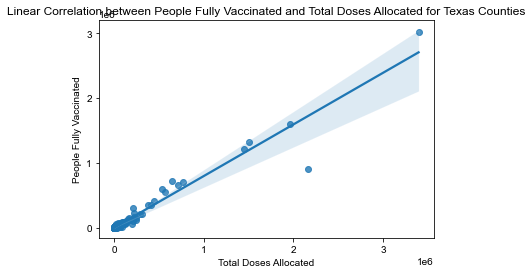

In [19]:
reg=sns.regplot(y=new_table['People Fully Vaccinated'],x=new_table['Total Doses Allocated']).set(title="Linear Correlation between People Fully Vaccinated and Total Doses Allocated for Texas Counties")
sns.set(font_scale=2)
plt.rcParams['figure.figsize'] = [20, 10]

Now, lets plot a regression line with confidence interval between People Fully Vaccinated versus the General Population of each county.

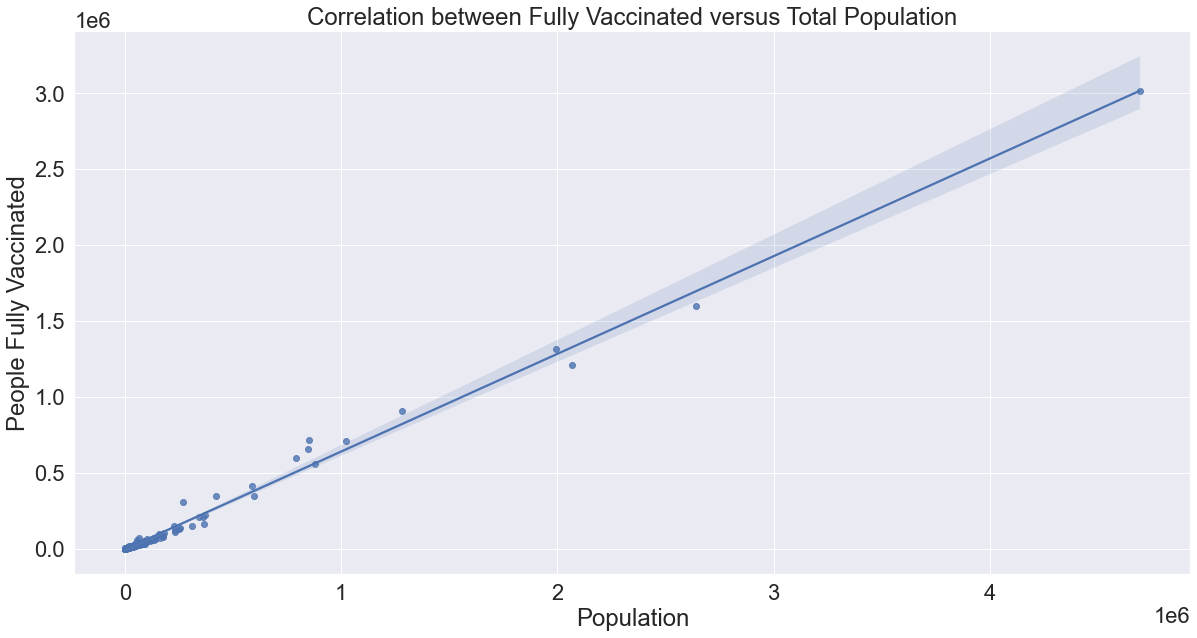

In [20]:
scatter_pop=sns.regplot(x='Population',y='People Fully Vaccinated', data=new_table).set(title="Correlation between Fully Vaccinated versus Total Population")

Now, lets plot Fatalities versus Cases in Each county!

<AxesSubplot:title={'center':'Fatalities versus Confirmed Cases in Each County'}, xlabel='Confirmed Cases', ylabel='Fatalities'>

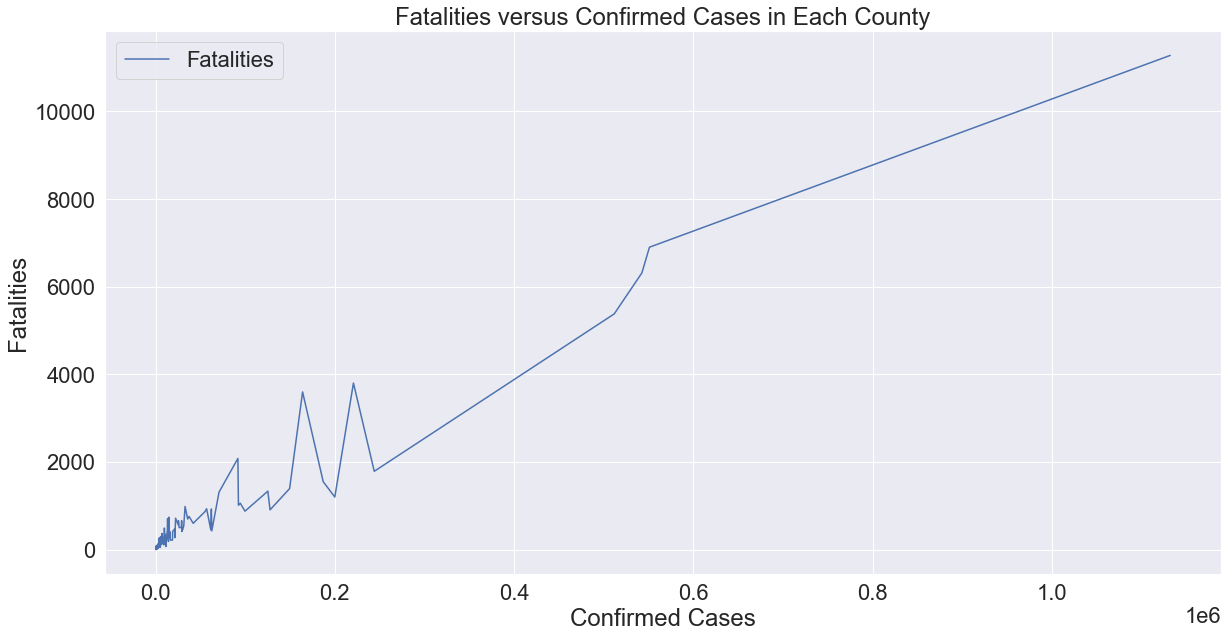

In [21]:
pplot = new_table.sort_values(['Confirmed Cases'],ascending=True)
pplot.plot.line(x='Confirmed Cases', y='Fatalities', title="Fatalities versus Confirmed Cases in Each County", ylabel="Fatalities")

Now, I want to make a new table so that I can reoder the counties by the size of population. The first new table is named _ascend_. _another_new_table_ taken on all the columns other that Population and keeps them in the same order. Then, I make a variable _toptwenty_ and take the 20 counties with highest populations to make a stacked barplot. Label the axis and add a title, and rotate the names of County by 45 degrees to make it easier to read.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Loving'),
  Text(1, 0, 'King'),
  Text(2, 0, 'Kenedy'),
  Text(3, 0, 'Borden'),
  Text(4, 0, 'McMullen'),
  Text(5, 0, 'Kent'),
  Text(6, 0, 'Terrell'),
  Text(7, 0, 'Roberts'),
  Text(8, 0, 'Foard'),
  Text(9, 0, 'Motley'),
  Text(10, 0, 'Sterling'),
  Text(11, 0, 'Stonewall'),
  Text(12, 0, 'Glasscock'),
  Text(13, 0, 'Cottle'),
  Text(14, 0, 'Irion'),
  Text(15, 0, 'Throckmorton'),
  Text(16, 0, 'Briscoe'),
  Text(17, 0, 'Armstrong'),
  Text(18, 0, 'Edwards'),
  Text(19, 0, 'Dickens')])

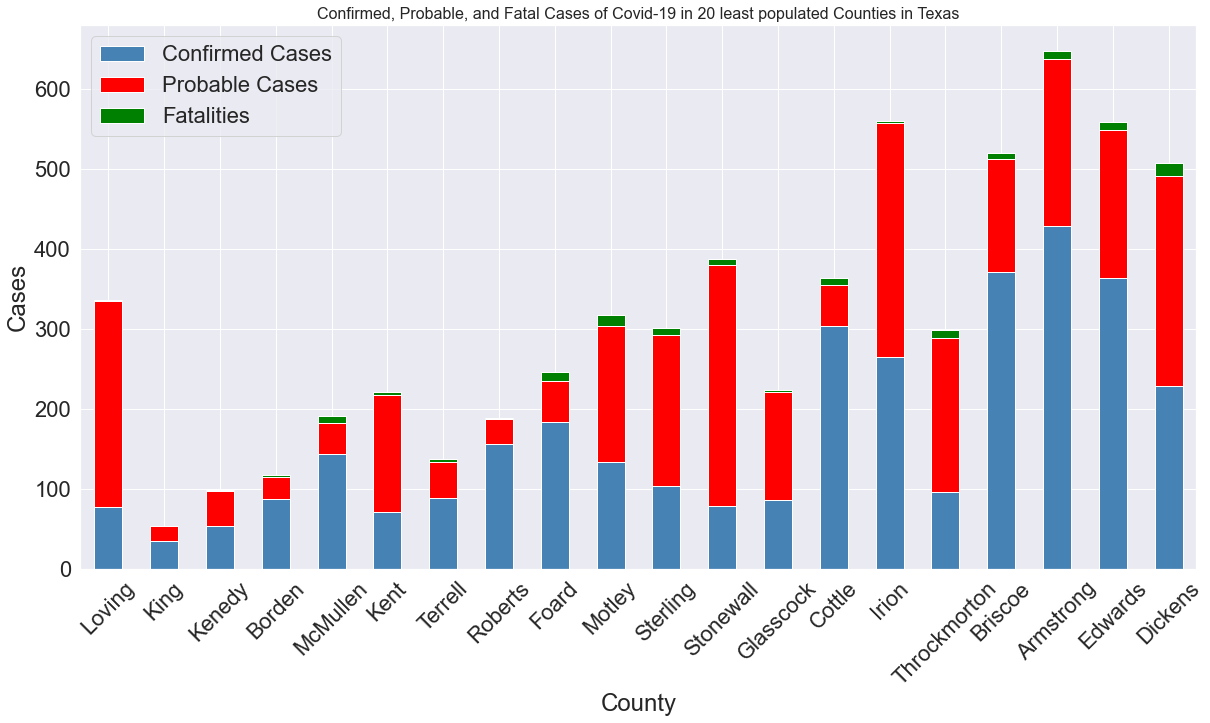

In [22]:
new_table2=new_table[['County','Population','Confirmed Cases','Probable Cases', 'Fatalities']].copy()
new_table2
ascend = new_table2.sort_values(['Population'],ascending=True)
another_new_table=ascend[['County','Confirmed Cases','Probable Cases', 'Fatalities']].copy()

toptwenty=another_new_table.head(20)
toptwenty.set_index('County').plot(kind='bar', stacked=True, color=['steelblue', 'red','green'])
plt.title('Confirmed, Probable, and Fatal Cases of Covid-19 in 20 least populated Counties in Texas', fontsize=16)

#add axis titles
plt.xlabel('County')
plt.ylabel('Cases')

#rotate x-axis labels
plt.xticks(rotation=45)

Now, do the same for the least populated counties. set ascending to False, and have them listed in the descending order in the new table. Graph 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Harris'),
  Text(1, 0, 'Dallas'),
  Text(2, 0, 'Tarrant'),
  Text(3, 0, 'Bexar'),
  Text(4, 0, 'Travis'),
  Text(5, 0, 'Collin'),
  Text(6, 0, 'Denton'),
  Text(7, 0, 'Hidalgo'),
  Text(8, 0, 'El Paso'),
  Text(9, 0, 'Fort Bend'),
  Text(10, 0, 'Montgomery'),
  Text(11, 0, 'Williamson'),
  Text(12, 0, 'Cameron'),
  Text(13, 0, 'Brazoria'),
  Text(14, 0, 'Bell'),
  Text(15, 0, 'Nueces'),
  Text(16, 0, 'Galveston'),
  Text(17, 0, 'Lubbock'),
  Text(18, 0, 'Webb'),
  Text(19, 0, 'McLennan')])

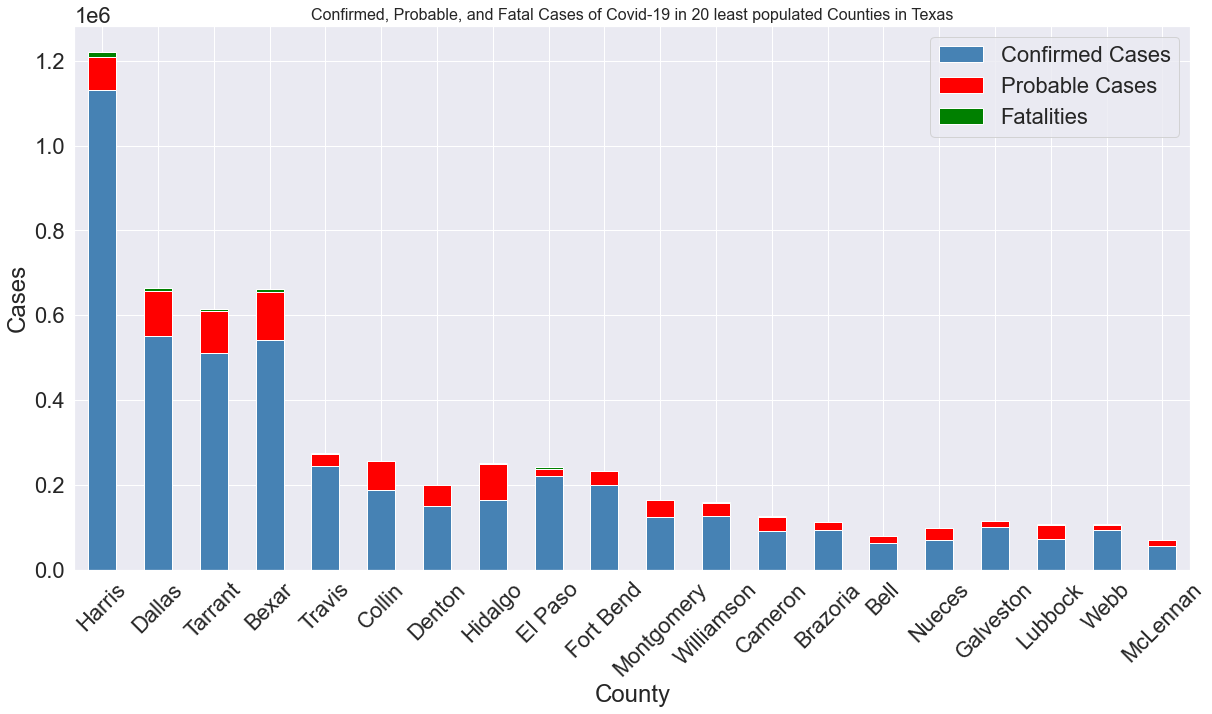

In [23]:
descend = new_table2.sort_values(['Population'],ascending=False)
yet_another_new_table=descend[['County','Confirmed Cases','Probable Cases', 'Fatalities']].copy()

bottomten=yet_another_new_table.head(20)
bottomtwenty=bottomten.set_index('County').plot(kind='bar', stacked=True, color=['steelblue', 'red','green'])
plt.title('Confirmed, Probable, and Fatal Cases of Covid-19 in 20 least populated Counties in Texas', fontsize=16)

#add axis titles
plt.xlabel('County')
plt.ylabel('Cases')

#rotate x-axis labels
plt.xticks(rotation=45)

In [24]:
new_table['Percent_Vaccinated'] = new_table['People Fully Vaccinated']/new_table['Population']*100

In [25]:
new_table

,County,Population,People Fully Vaccinated,Total Doses Allocated,Confirmed Cases,Probable Cases,Fatalities,Median Income,Percent_Vaccinated
0,Anderson,57373,24550,17870,7196,3340,250,50879,42.790163
1,Andrews,18660,8337,6100,3614,1052,73,76600,44.678457
2,Angelina,87038,40302,58100,9669,6869,492,49943,46.303913
3,Aransas,23673,14153,6840,3953,1236,92,51461,59.785410
4,Archer,8524,4190,3200,2178,316,28,69566,49.155326
...,...,...,...,...,...,...,...,...,...
249,Wood,45659,20238,6700,5538,3563,297,61886,44.324230
250,Yoakum,8554,3510,3400,1098,523,42,67132,41.033435
251,Young,18104,7514,8500,3625,679,95,54569,41.504640
252,Zapata,13985,8576,8400,2558,1647,56,39876,61.322846


[Text(0.5, 1.0, '% Population Vaccinated versus Median Income of the County')]

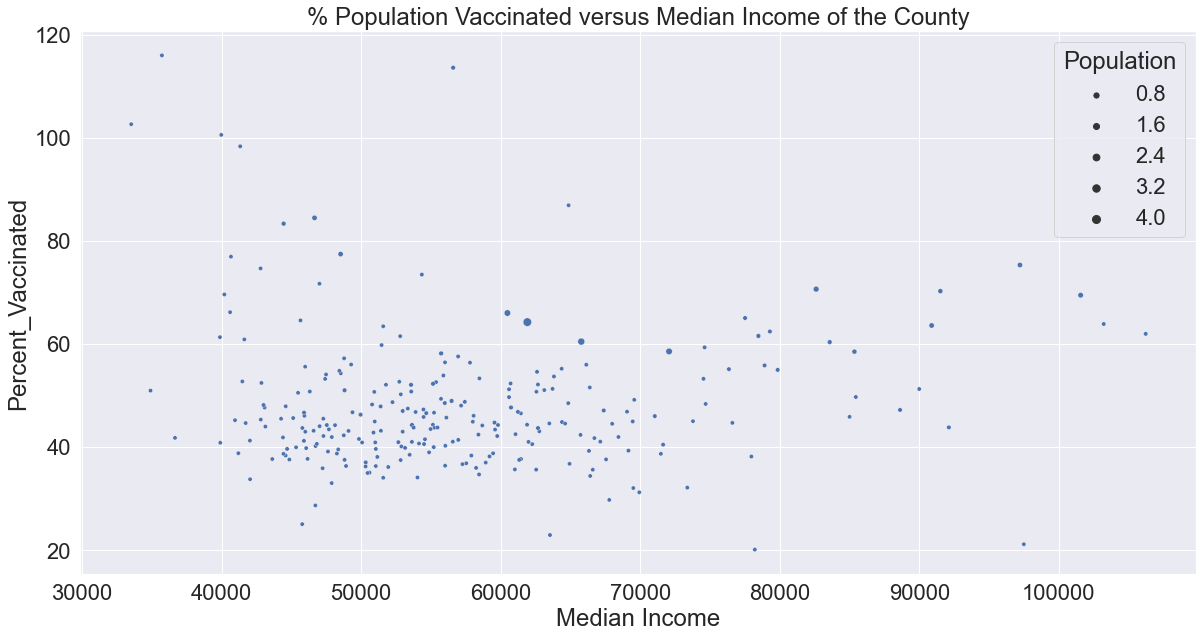

In [26]:
sns.scatterplot(x="Median Income", y="Percent_Vaccinated", data=new_table, size="Population").set(title="% Population Vaccinated versus Median Income of the County")

Note: the Population factor is for some reason not showing the scale - it is measured in millions of people.

In the plot above, you can see several values above 100%. Let's look into it.

In [27]:
new_table.loc[new_table.Percent_Vaccinated >100,:]

,County,Population,People Fully Vaccinated,Total Doses Allocated,Confirmed Cases,Probable Cases,Fatalities,Median Income,Percent_Vaccinated
23,Brooks,6939,7124,3400,1299,602,52,33513,102.666090
188,Presidio,6459,6497,5300,785,308,40,39967,100.588326
213,Starr,62860,72928,43780,16086,6931,370,35716,116.016545
239,Webb,269697,306453,206550,94462,11163,1058,56588,113.628628


As you can see, there are four counties with more fully vaccinated people reported than population. There could be several reasons for that. For one, the population values could have not been updated frequently enough, it could be the values from 2020 census estimated for 2022. Another possiblity is that these counties have people from other counties coming in to get vaccinated there. It could also be false reporting, but that would create a lot more issues.

For the final chart, I'd like to plot the 20 most populated counties again, but this time inclusing the total population in the visual and having everything in % for easier comparison. The last line is there to save the graph as an image!

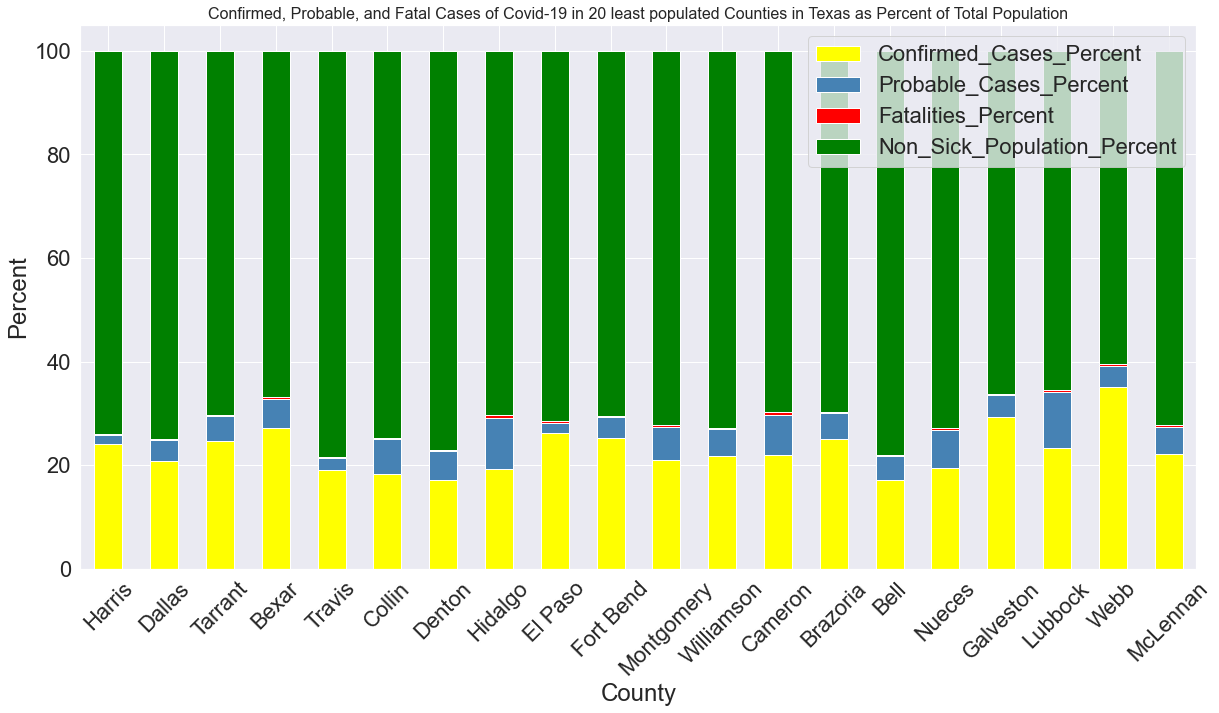

In [28]:
descend = new_table2.sort_values(['Population'],ascending=False)
yet_another_new_table=descend[['County','Confirmed Cases','Probable Cases', 'Fatalities']].copy()
wow_another_new_table=descend[['County']].copy()
wow_another_new_table['Confirmed_Cases_Percent']=yet_another_new_table['Confirmed Cases']/descend['Population']*100
wow_another_new_table['Probable_Cases_Percent']=yet_another_new_table['Probable Cases']/descend['Population']*100
wow_another_new_table['Fatalities_Percent']=yet_another_new_table['Fatalities']/descend['Population']*100
wow_another_new_table['Non_Sick_Population_Percent']=100-wow_another_new_table['Confirmed_Cases_Percent']-wow_another_new_table['Probable_Cases_Percent']-wow_another_new_table['Fatalities_Percent']

bottomten=wow_another_new_table.head(20)
bottomtwenty=bottomten.set_index('County').plot(kind='bar', stacked=True, color=['yellow','steelblue', 'red','green'])
plt.title('Confirmed, Probable, and Fatal Cases of Covid-19 in 20 least populated Counties in Texas as Percent of Total Population', fontsize=16)

#add axis titles
plt.xlabel('County')
plt.ylabel('Percent')

#rotate x-axis labels
plt.xticks(rotation=45)

plt.savefig('test.png', bbox_inches='tight')

In this stacked plot above, we can see the Conofirmed, Probable, and Fatal cases as percent of the population in each county. As you can see, the rate of sickness was higher in some of the smaller counties - such as Webb and Lubbock - despite having less people in the larger area. If we were to search for reasons, it would be important to look at the people's attituded towards covid and the precautions taken, as well as the ages of the residents.